In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/GhazalDataset.zip

In [ ]:
!pip install hazm

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install -q sentencepiece
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB/s eta 0:00:00


In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dirpath = "./GhazalDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,ای باد بی‌آرام ما با گل بگو پیغام ما کای گل گ...,moulavi
1,ای گشته ز شاه عشق شهمات در خشم مباش و در مکاف...,moulavi
2,آخر بشنید آن مه آه سحر ما را تا حشر دگر آمد ا...,moulavi
3,گویم سخن شکرنباتت یا قصه چشمه حیاتت رخ بر رخ...,moulavi
4,اسیر شیشه کن آن جنیان دانا را بریز خون دل آن ...,moulavi
...,...,...
2426,کاروانی شکر از مصر به شیراز آید اگر آن یار سف...,saadi
2427,چه دل‌ها بردی ای ساقی به ساق فتنه‌انگیزت دریغ...,saadi
2428,دوش دور از رویت ای جان جانم از غم تاب داشت اب...,saadi
2429,عشقبازی نه من آخر به جهان آوردم یا گناهیست که...,saadi


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



moulavi    501
attar      500
saadi      500
hafez      495
sanaee     435
Name: poet, dtype: int64


<Axes: >

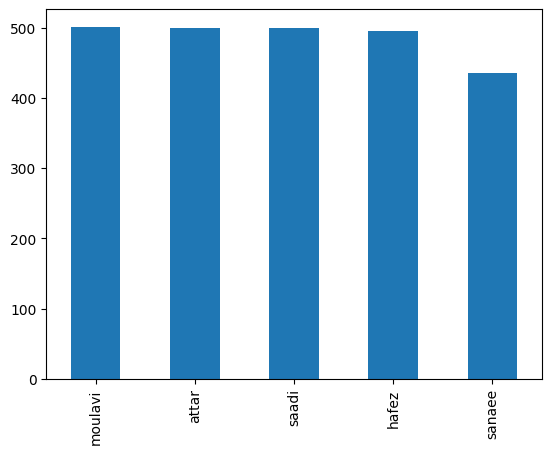

In [ ]:
count = df['poet'].value_counts()

print(count)
count.plot.bar()

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,ای باد بی آرام ما با گل بگو پیغام ما کای گل گر...,moulavi
1,ای گشته ز شاه عشق شهمات در خشم مباش و در مکافا...,moulavi
2,آخر بشنید آن مه آه سحر ما را تا حشر دگر آمد ام...,moulavi
3,گویم سخن شکرنباتت یا قصه چشمه حیاتت رخ بر رخ م...,moulavi
4,اسیر شیشه کن آن جنیان دانا را بریز خون دل آن خ...,moulavi
...,...,...
2426,کاروانی شکر از مصر به شیراز آید اگر آن یار سفر...,saadi
2427,چه دل ها بردی ای ساقی به ساق فتنه انگیزت دریغا...,saadi
2428,دوش دور از رویت ای جان جانم از غم تاب داشت ابر...,saadi
2429,عشقبازی نه من آخر به جهان آوردم یا گناهیست که ...,saadi


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  # text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,گل پیغام کای گل گریز شکر گشتی گلشن گل اصل شکری...,moulavi
1,شاه عشق شهمات خشم مباش مکافات باغ فنا درآ بنگر...,moulavi
2,بشنید مه آه سحر حشر حشر چرخ زند مه سینه دور قم...,moulavi
3,سخن شکرنباتت قصه چشمه حیاتت رخ رخ نهی شاه ماتت...,moulavi
4,اسیر شیشه جنیان دانا بریز خون دل خونیان صهبا ر...,moulavi
...,...,...
2426,کاروانی شکر مصر شیراز یار سفرکرده بازآید بازآی...,saadi
2427,دل بردی ساقی ساق فتنه انگیزت بوسه چندی زنخدان ...,saadi
2428,دوش دور رویت جان جانم غم تاب ابر چشمم رخ سودای...,saadi
2429,عشقبازی جهان آوردم گناهیست مسکین دل خبری غم دل...,saadi


In [ ]:
df['cleaned_poems'] = df['poem'].apply(lambda t: normalizer.normalize(t))
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,گل پیغام کای گل گریز شکر گشتی گلشن گل اصل شکری...,moulavi
1,شاه عشق شهمات خشم مباش مکافات باغ فنا درآ بنگر...,moulavi
2,بشنید مه آه سحر حشر حشر چرخ زند مه سینه دور قم...,moulavi
3,سخن شکرنباتت قصه چشمه حیاتت رخ رخ نهی شاه ماتت...,moulavi
4,اسیر شیشه جنیان دانا بریز خون دل خونیان صهبا ر...,moulavi
...,...,...
2426,کاروانی شکر مصر شیراز یار سفرکرده بازآید بازآی...,saadi
2427,دل بردی ساقی ساق فتنه انگیزت بوسه چندی زنخدان ...,saadi
2428,دوش دور رویت جان جانم غم تاب ابر چشمم رخ سودای...,saadi
2429,عشقبازی جهان آوردم گناهیست مسکین دل خبری غم دل...,saadi


In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['attar', 'hafez', 'moulavi', 'saadi', 'sanaee']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,گل پیغام کای گل گریز شکر گشتی گلشن گل اصل شکری...,moulavi,2
1,شاه عشق شهمات خشم مباش مکافات باغ فنا درآ بنگر...,moulavi,2
2,بشنید مه آه سحر حشر حشر چرخ زند مه سینه دور قم...,moulavi,2
3,سخن شکرنباتت قصه چشمه حیاتت رخ رخ نهی شاه ماتت...,moulavi,2
4,اسیر شیشه جنیان دانا بریز خون دل خونیان صهبا ر...,moulavi,2
...,...,...,...
2426,کاروانی شکر مصر شیراز یار سفرکرده بازآید بازآی...,saadi,3
2427,دل بردی ساقی ساق فتنه انگیزت بوسه چندی زنخدان ...,saadi,3
2428,دوش دور رویت جان جانم غم تاب ابر چشمم رخ سودای...,saadi,3
2429,عشقبازی جهان آوردم گناهیست مسکین دل خبری غم دل...,saadi,3


In [ ]:
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'attar': 0, 'hafez': 1, 'moulavi': 2, 'saadi': 3, 'sanaee': 4}
id2label: {0: 'attar', 1: 'hafez', 2: 'moulavi', 3: 'saadi', 4: 'sanaee'}


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
val_data, test_data = train_test_split(test_data, test_size=0.1, random_state=1, shuffle=True)

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoConfig, AutoTokenizer

MODEL_NAME = 'm3hrdadfi/albert-fa-base-v2-clf-digimag'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
SEQ_LEN = 256
BATCH_SIZE = 32
LEARNING_RATE = 2e-5

In [ ]:
tokens = tokenizer(train_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
val_data_tokens = tokenizer(val_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
test_data_tokens = tokenizer(test_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_train_le = le.fit_transform(train_data['label_id'])
y_valid_le  = le.fit_transform(val_data['label_id'])
y_test_le = le.fit_transform(test_data['label_id'])

hotlabels = to_categorical(y_train_le)
test_labels = to_categorical(y_test_le)
val_labels = to_categorical(y_valid_le)

In [ ]:
import tensorflow as tf

def map_func(input_ids, attention_mask, labels):
    return ({'input_ids': input_ids,
            'attention_mask': attention_mask}, labels)


train_dataset = tf.data.Dataset.from_tensor_slices((tokens['input_ids'], tokens['attention_mask'], hotlabels))
train_dataset = train_dataset.map(map_func)
train_dataset = train_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)


val_dataset = tf.data.Dataset.from_tensor_slices((val_data_tokens['input_ids'], val_data_tokens['attention_mask'], val_labels))
val_dataset = val_dataset.map(map_func)
val_dataset = val_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_tokens['input_ids'], test_data_tokens['attention_mask'], test_labels))
test_dataset = test_dataset.map(map_func)
test_dataset = test_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
from transformers import TFAutoModel, TFAlbertForSequenceClassification
classificationModel = TFAlbertForSequenceClassification.from_pretrained(MODEL_NAME)

Some layers from the model checkpoint at m3hrdadfi/albert-fa-base-v2-clf-digimag were not used when initializing TFAlbertForSequenceClassification: ['dropout_7']
- This IS expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertForSequenceClassification were initialized from the model checkpoint at m3hrdadfi/albert-fa-base-v2-clf-digimag.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertForSequenceClassification for predictions without further training.


In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')
classificationResult = classificationModel([input_ids, mask]).logits
Final_output = tf.keras.layers.Dense(5, activation ='softmax', trainable=True)(classificationResult)

In [ ]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=Final_output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_albert_for_sequence_cla  TFSequenceClassifierOutput   1808896   ['input_ids[0][0]',           
 ssification (TFAlbertForSe  (loss=None, logits=(None,    7          'attention_mask[0][0]']      
 quenceClassification)       7),                                                              

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE) #decay=1e-6
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
60/60 [==============================] - 115s 2s/step - loss: 1.4839 - accuracy: 0.3651 - val_loss: 0.9954 - val_accuracy: 0.6683
Epoch 2/5
60/60 [==============================] - 104s 2s/step - loss: 0.5146 - accuracy: 0.8255 - val_loss: 0.2905 - val_accuracy: 0.9111
Epoch 3/5
60/60 [==============================] - 103s 2s/step - loss: 0.2531 - accuracy: 0.9208 - val_loss: 0.2508 - val_accuracy: 0.9135
Epoch 4/5
60/60 [==============================] - 100s 2s/step - loss: 0.1483 - accuracy: 0.9578 - val_loss: 0.2070 - val_accuracy: 0.9303
Epoch 5/5
60/60 [==============================] - 100s 2s/step - loss: 0.0740 - accuracy: 0.9833 - val_loss: 0.2277 - val_accuracy: 0.9303


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

1/1 [==============================] - 1s 680ms/step - loss: 0.1821 - accuracy: 0.9688


In [ ]:
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.1821
Test Accuracy: 0.9688


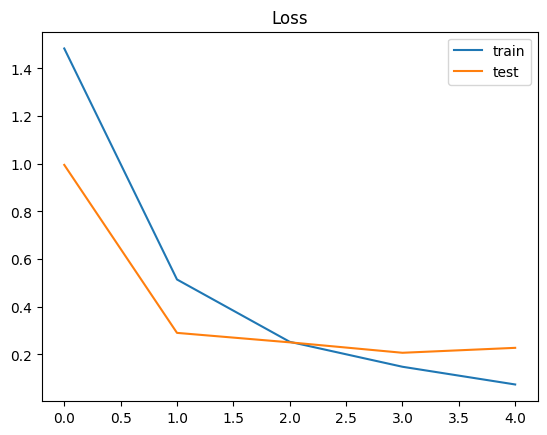

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
def prep_data(text):
    tokens = tokenizer(text, max_length=SEQ_LEN, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    return ({'input_ids': tokens['input_ids'], 'attention_mask': tokens['attention_mask']})

In [ ]:
import numpy as np

test_data['predicted-label'] = None
# i = 0
for i, text in zip(test_data.index, test_data['poem']):
    tokens = prep_data(text)
    probs = model.predict(tokens)
    pred = np.argmax(probs)
    test_data['predicted-label'][i] = pred


In [ ]:
testlist = test_data['label_id'].tolist()
predlist = test_data['predicted-label'].tolist()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(testlist, predlist, target_names=labels))

              precision    recall  f1-score   support

       attar       1.00      1.00      1.00        10
       hafez       1.00      1.00      1.00        11
     moulavi       0.89      0.80      0.84        10
       saadi       0.88      1.00      0.93         7
      sanaee       0.91      0.91      0.91        11

    accuracy                           0.94        49
   macro avg       0.93      0.94      0.94        49
weighted avg       0.94      0.94      0.94        49



<Axes: >

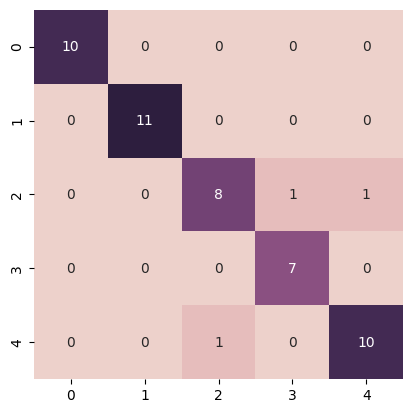

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(testlist, predlist)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)